In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D, Dropout
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
# load the path of image folder and  csv

train_img = 'D:\\Assignment_Problem\\train_img'
test_img = 'D:\\Assignment_Problem\\test_img'
train_csv = 'D:\\Assignment_Problem\\train_val.csv'

In [29]:
#Read CSV
train_data = pd.read_csv(train_csv)
train_data.head(5)

,image_index,type
0,0,vbar_categorical
1,1,vbar_categorical
2,2,vbar_categorical
3,3,vbar_categorical
4,4,vbar_categorical


In [30]:
#Load the image from train_img
# Create an empty list to store the preprocessed images

x_images = []
y_labels = []


for filename in os.listdir(train_img):
     if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(train_img, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = np.array(img)
        # Append the array to the list of images
        x_images.append(img_array)
        y_labels.append(filename)


# Convert the image list to a NumPy array
x_image = np.array(x_images)
y_labels = np.array(y_labels)


# Save the arrays in NumPy format
np.save('x_train.npy', x_images)
np.save('y_train.npy', y_labels)

In [31]:
#Load the image from test_img
# Create an empty list to store the preprocessed images

test_images = []
test_labels = []


for filename in os.listdir(test_img):
     if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(test_img, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = np.array(img)
        # Append the array to the list of images
        test_images.append(img_array)
        test_labels.append(filename)


# Convert the image list to a NumPy array
test_image = np.array(test_images)
test_labels = np.array(test_labels)


# Save the arrays in NumPy format
np.save('x_test.npy', test_images)
np.save('y_test.npy', test_labels)

In [32]:
#load the split data
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [33]:
#Check the length of the split data
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1000
50
1000
50


In [34]:
#shape of data
print(x_train.shape)
print(x_test.shape)

(1000, 128, 128, 3)
(50, 128, 128, 3)


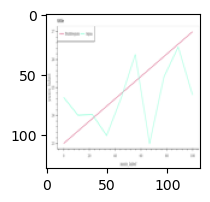

In [35]:
# check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [37]:
#classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']

# Define the mapping of categorical values to numerical values
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_data['type']])
y_train
y_train.shape
y_test.shape

(50,)

In [38]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample

def sample_image(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index])
    
# image_label = train_val_labels.iloc[index]['type']
# plt.xlabel(image_label)
    plt.xlabel(image_classes[y[index]])

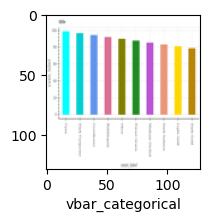

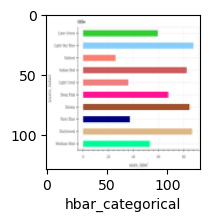

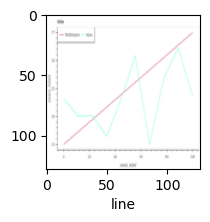

In [39]:
sample_image(x_train,y_train,0)
sample_image(x_train,y_train,208)
sample_image(x_train,y_train,444)

In [40]:
# Normalize the data
x_image = x_image / 255
test_image = test_image/ 255


In [41]:
test_image.shape

(50, 128, 128, 3)

In [42]:
x_image.shape

(1000, 128, 128, 3)

In [49]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [50]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 3s 162ms/step - loss: 23759.5293 - accuracy: 0.1850


[23759.529296875, 0.1850000023841858]

In [51]:
# modify the model architecture to cmnn
cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)), 
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])


In [52]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=128, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
7/7 [==============================] - 23s 3s/step - loss: 343.9228 - accuracy: 0.1863 - val_loss: 53.9770 - val_accuracy: 0.2450
Epoch 2/10
7/7 [==============================] - 18s 3s/step - loss: 24.8597 - accuracy: 0.2250 - val_loss: 6.3236 - val_accuracy: 0.2400
Epoch 3/10
7/7 [==============================] - 19s 3s/step - loss: 3.5335 - accuracy: 0.2600 - val_loss: 1.3258 - val_accuracy: 0.5500
Epoch 4/10
7/7 [==============================] - 20s 3s/step - loss: 1.2433 - accuracy: 0.4875 - val_loss: 1.3955 - val_accuracy: 0.4200
Epoch 5/10
7/7 [==============================] - 19s 3s/step - loss: 1.0943 - accuracy: 0.5512 - val_loss: 1.4500 - val_accuracy: 0.4600
Epoch 6/10
7/7 [==============================] - 20s 3s/step - loss: 0.8967 - accuracy: 0.6075 - val_loss: 1.9041 - val_accuracy: 0.5150
Epoch 7/10
7/7 [==============================] - 22s 3s/step - loss: 1.0238 - accuracy: 0.6837 - val_loss: 1.5788 - val_accuracy: 0.5100
Epoch 8/10
7/7 [==============

In [54]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loass:', test_loss)

7/7 [==============================] - 1s 153ms/step - loss: 23759.5293 - accuracy: 0.1850
Test accuracy: 0.1850000023841858
Test loass: 23759.529296875


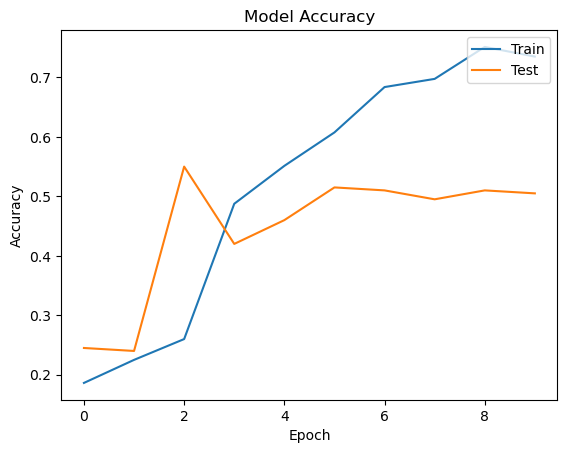

In [55]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

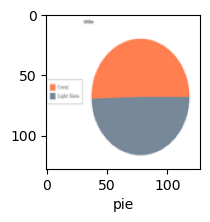

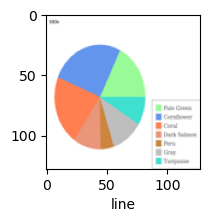

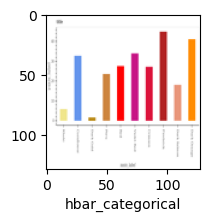

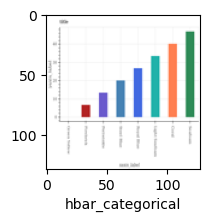

In [57]:
sample_image(x_test,y_test,1)
sample_image(x_test,y_test,50)
sample_image(x_test,y_test,25)
sample_image(x_test,y_test,30)

In [59]:
from tensorflow.keras.applications import ResNet50

# Load the pre-trained ResNet50 model
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Remove the last layer
resnet50_output = resnet50.layers[-1].output


94765736/94765736 [==============================] - 32s 0us/step


In [60]:
from tensorflow.keras.layers import Dense, Flatten

# Define the number of classes for the new task
num_classes = 5

# Add a new output layer
x = Flatten()(resnet50_output)
output_layer = Dense(num_classes, activation='softmax')(x)

# Create a new model with the new output layer
model = tf.keras.Model(inputs=resnet50.input, outputs=output_layer)

# Freeze the weights of all layers except for the new output layer
for layer in model.layers[:-1]:
    layer.trainable = False


In [61]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Generate training data
train_data = train_datagen.flow_from_directory(
    'D:\\Assignment_Problem\\train_img',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Train the model
model.fit(train_data, epochs=10)

Found 0 images belonging to 0 classes.


ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [64]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    'D:\\Assignment_Problem\\test_img',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

model.evaluate(test_data)

Found 0 images belonging to 0 classes.


ValueError: Asked to retrieve element 0, but the Sequence has length 0